In [1]:
from time import perf_counter
import sys, os
sys.path.insert(0, os.path.abspath('..'))
import warnings
warnings.filterwarnings('ignore')

from preprocess import prepare_dataset
from validation.models import RidgeCV, LassoCV, KnnCV, SvrCV, RandomForestCV, ExtraTreeCV
from validation import set_baseline, get_best_models, plot_train_val, find_winner

X_train, X_val, y_train, y_val = prepare_dataset(kind='cv')

In [2]:
baseline = set_baseline(X_train, X_val, y_train, y_val)

Baseline loss: 2159445.526444445
Baseline score: 0.4124612701450111


In [4]:
from validation.models import RidgeCV, LassoCV, KnnCV, SvrCV, RandomForestCV, ExtraTreeCV
models = [RidgeCV, LassoCV, KnnCV, SvrCV, RandomForestCV, ExtraTreeCV]
results = get_best_models(models, X_train, X_val, y_train, y_val)

Start training Ridge with {'alpha': 0.1}
Start training Ridge with {'alpha': 0.5}
Start training Ridge with {'alpha': 1.0}
Start training Ridge with {'alpha': 10.0}
Start training Ridge with {'alpha': 20.0}
Start training Lasso with {'alpha': 0.1}
Start training Lasso with {'alpha': 0.5}
Start training Lasso with {'alpha': 1.0}
Start training Lasso with {'alpha': 10.0}
Start training Lasso with {'alpha': 20.0}
Start training KNN with {'n_neighbors': 5}
Start training KNN with {'n_neighbors': 6}
Start training KNN with {'n_neighbors': 7}
Start training KNN with {'n_neighbors': 8}
Start training KNN with {'n_neighbors': 9}
Start training KNN with {'n_neighbors': 10}
Start training SVR with {'gamma': 0.001, 'C': 0.001}
Start training SVR with {'gamma': 0.001, 'C': 0.01}
Start training SVR with {'gamma': 0.001, 'C': 0.1}
Start training SVR with {'gamma': 0.001, 'C': 1.0}
Start training SVR with {'gamma': 0.001, 'C': 10.0}
Start training SVR with {'gamma': 0.001, 'C': 100.0}
Start training 

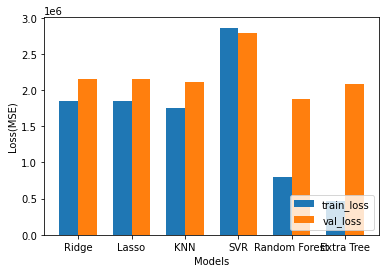

In [6]:
plot_train_val(results, type='loss', label='Loss(MSE)')

In [7]:
winner_model = sorted(results, key=lambda x: x['val_score'], reverse=True)[0]['best_model']

X_train, X_test, y_train, y_test = prepare_dataset(kind='train')
winner_model.fit(X_train, y_train)
print(winner_model.score(X_test, y_test))

0.7139621513820125


In [17]:
import numpy as np
float_formatter = "{:.10f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

sorted(zip(X_train.columns, winner_model.feature_importances_), key=lambda x: x[1], reverse=True)[:5]

[('Developer_mean_enc', 0.566206206321228),
 ('Publisher_mean_enc', 0.09931646489614794),
 ('Year', 0.06255076444931491),
 ('Rating', 0.04825950680098244),
 ('Month', 0.04562643958928959)]